<a href="https://www.kaggle.com/code/melaneemelanee/natural-language-processing-with-rnns?scriptVersionId=101543612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook is taken from: https://www.youtube.com/watch?v=tPYj3fFJGjk


# Natural Language Processing (NLP)
Natural Language Processing (or NLP for short) is a discipline in computing that deals with the communication between natural (human) languages and computer languages. A common example of NLP is something like spellcheck or autocomplete. Essentially NLP is the field that focuses on how computers can understand and/or process natural/human languages. 

### Recurrent Neural Networks (RNNs)

In this tutorial we will introduce a new kind of neural network that is much more capable of processing sequential data such as text or characters called a **recurrent neural network** (RNN for short). 

We will learn how to use a reccurent neural network to do the following:
- Sentiment Analysis
- Character Generation 

RNN's are complex and come in many different forms so in this tutorial we wil focus on how they work and the kind of problems they are best suited for.



## Sequence Data
In the previous tutorials we focused on data that we could represent as one static data point where the notion of time or step was irrelevant. Take for example our image data, it was simply a tensor of shape (width, height, channels). That data doesn't change or care about the notion of time. 

In this tutorial we will look at sequences of text and learn how we can encode them in a meaningful way. Unlike images, sequence data such as 
<span style="color:green;"> 
    long chains of text, weather patterns, videos 
</span> 
and really anything where the notion of a step or time is relevant needs to be processed and handled in a special way. 

But what do I mean by sequences and why is text data a sequence? Well that's a good question. Since textual data contains many words that follow in a very specific and meaningful order, we need to be able to keep track of each word and when it occurs in the data. Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with. This is why we treat text as a sequence and process one word at a time. We will keep track of where each of these words appear and use that information to try to understand the meaning of peices of text.



## Encoding Text
As we know machine learning models and neural networks don't take raw text data as an input. This means we must somehow encode our textual data to numeric values that our models can understand. There are many different ways of doing this and we will look at a few examples below. 

Before we get into the different encoding/preprocessing methods let's understand the information we can get from textual data by looking at the following two movie reviews.

```I thought the movie was going to be bad, but it was actually amazing!```

```I thought the movie was going to be amazing, but it was actually bad!```

Although these two setences are very similar we know that they have very different meanings. This is because of the **ordering** of words, a very important property of textual data.

Now keep that in mind while we consider some different ways of encoding our textual data.

### Bag of Words
The first and simplest way to encode our data is to use something called **bag of words**. This is a pretty easy technique where each word in a sentence is encoded with an integer and thrown into a collection that does not maintain the order of the words but does keep track of the frequency. Have a look at the python function below that encodes a string of text into bag of words. 

In [1]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word]  # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1
    
    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


This isn't really the way we would do this in practice, but I hope it gives you an idea of how bag of words works. Notice that we've lost the order in which words appear. In fact, let's look at how this encoding works for the two sentences we showed above.



In [2]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_bag = bag_of_words(positive_review)
neg_bag = bag_of_words(negative_review)

print("Positive:", pos_bag)
print("Negative:", neg_bag)

Positive: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1}
Negative: {10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 1, 5: 1, 16: 1, 21: 1, 18: 1, 19: 1, 20: 1, 17: 1}


We can see that even though these sentences have a very different meaning they are encoded exaclty the same way. Obviously, this isn't going to fly. Let's look at some other methods.



### Integer Encoding
The next technique we will look at is called **integer encoding**. This involves representing each word or character in a sentence as a unique integer and maintaining the order of these words. This should hopefully fix the problem we saw before were we lost the order of words.


In [3]:
vocab = {}  
word_encoding = 1
def one_hot_encoding(text):
  global word_encoding

  words = text.lower().split(" ") 
  encoding = []  

  for word in words:
    if word in vocab:
      code = vocab[word]  
      encoding.append(code) 
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1
  
  return encoding

text = "this is a test to see if this test will work is is test a a"
encoding = one_hot_encoding(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 1, 4, 8, 9, 2, 2, 4, 3, 3]
{'this': 1, 'is': 2, 'a': 3, 'test': 4, 'to': 5, 'see': 6, 'if': 7, 'will': 8, 'work': 9}


And now let's have a look at one hot encoding on our movie reviews.

In [4]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"

pos_encode = one_hot_encoding(positive_review)
neg_encode = one_hot_encoding(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [10, 11, 12, 13, 14, 15, 5, 16, 17, 18, 19, 14, 20, 21]
Negative: [10, 11, 12, 13, 14, 15, 5, 16, 21, 18, 19, 14, 20, 17]


Much better, now we are keeping track of the order of words and we can tell where each occurs. But this still has a few issues with it. Ideally when we encode words, we would like similar words to have similar labels and different words to have very different labels. For example, the words happy and joyful should probably have very similar labels so we can determine that they are similar. While words like horrible and amazing should probably have very different labels. The method we looked at above won't be able to do something like this for us. This could mean that the model will have a very difficult time determing if two words are similar or not which could result in some pretty drastic performace impacts.



### Word Embeddings
Luckily there is a third method that is far superior, **word embeddings**. This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

This is the technique we will use for our examples and its implementation will be showed later on



## Recurrent Neural Networks (RNNs)
Now that we've learned a little bit about how we can encode text it's time to dive into recurrent neural networks. Up until this point we have been using something called **feed-forward** neural networks. This simply means that all our data is fed forwards (all at once) from left to right through the network. This was fine for the problems we considered before but won't work very well for processing text. After all, even we (humans) don't process text all at once. We read word by word from left to right and keep track of the current meaning of the sentence so we can understand the meaning of the next word. Well this is exaclty what a recurrent neural network is designed to do. When we say recurrent neural network all we really mean is a network that contains a loop. A RNN will process one word at a time while maintaining an internal memory of what it's already seen. This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.

This is why we are treating our text data as a sequence! So that we can pass one word at a time to the RNN.

Let's have a look at what a recurrent layer might look like.

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)
*Source: https://colah.github.io/posts/2015-08-Understanding-LSTMs/*

Let's define what all these variables stand for before we get into the explination.

**h<sub>t</sub>** output at time t

**x<sub>t</sub>** input at time t

**A** Recurrent Layer (loop)

What this diagram is trying to illustrate is that a recurrent layer processes words or input one at a time in a combination with the output from the previous iteration. So, as we progress further in the input sequence, we build a more complex understanding of the text as a whole.

What we've just looked at is called a **simple RNN layer**. It can be effective at processing shorter sequences of text for simple problems but has many downfalls associated with it. One of them being the fact that as text sequences get longer it gets increasingly difficult for the network to understand the text properly.



## LSTM
The layer we dicussed in depth above was called a *simpleRNN*. However, there does exist some other recurrent layers (layers that contain a loop) that work much better than a simple RNN layer. The one we will talk about here is called LSTM (Long Short-Term Memory). This layer works very similarily to the simpleRNN layer but adds a way to access inputs from any timestep in the past. Whereas in our simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear. 

For the purpose of this course we will refrain from going any further into the math or details behind how these layers work.

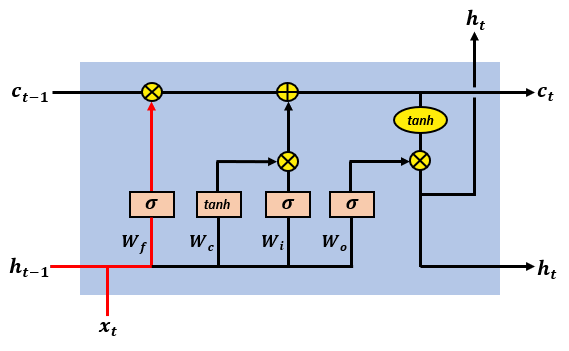

*Source:https://paperswithcode.com/method/lstm/ *



## Sentiment Analysis
And now time to see a recurrent neural network in action. For this example, we are going to do something called sentiment analysis.

The formal definition of this term from Wikipedia is as follows:

*the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.*

The example we’ll use here is classifying movie reviews as either postive, negative or neutral.

*This guide is based on the following tensorflow tutorial: https://www.tensorflow.org/tutorials/text/text_classification_rnn*



### Movie Review Dataset
Well start by loading in the IMDB movie review dataset from keras. This dataset contains 25,000 reviews from IMDB where each one is already preprocessed and has a label as either positive or negative. Each review is encoded by integers that represents how common a word is in the entire dataset. For example, a word encoded by the integer 3 means that it is the 3rd most common word in the dataset.
 




In [5]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
# Lets look at one review
train_data[1]

### More Preprocessing
If we have a look at some of our loaded in reviews, we'll notice that they are different lengths. This is an issue. We cannot pass different length data into our neural network. Therefore, we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 0's to make it equal to 250.

Luckily for us keras has a function that can do this for us:




In [ ]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

### Creating the Model
Now it's time to create the model. We'll use a word embedding layer as the first layer in our model and add a LSTM layer afterwards that feeds into a dense node to get our predicted sentiment. 

32 stands for the output dimension of the vectors generated by the embedding layer. We can change this value if we'd like!

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

### Training
Now it's time to compile and train the model. 

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

And we'll evaluate the model on our training data to see how well it performs.

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

So we're scoring somewhere in the mid-high 80's. Not bad for a simple recurrent network.

### Making Predictions
Now let’s use our network to make predictions on our own reviews. 

Since our reviews are encoded well need to convert any review that we write into that form so the network can understand it. To do that well load the encodings from the dataset and use them to encode our own data.




In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)


In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print(decode_integers(encoded))

In [ ]:
# now time to make a prediction

def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred) 
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(negative_review)


## RNN Play Generator

Now time for one of the coolest examples we've seen so far. We are going to use a RNN to generate a play. We will simply show the RNN an example of something we want it to recreate and it will learn how to write a version of it on its own. We'll do this using a character predictive model that will take as input a variable length sequence and predict the next character. We can use the model many times in a row with the output from the last predicition as the input for the next call to generate a sequence.


*This guide is based on the following: https://www.tensorflow.org/tutorials/text/text_generation*

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

### Dataset
For this example, we only need one peice of training data. In fact, we can write our own poem or play and pass that to the network for training if we'd like. However, to make things easy we'll use an extract from a shakesphere play.




In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

### Loading Your Own Data
To load your own data, you'll need to upload a file from the dialog below. Then you'll need to follow the steps from above but load in this new file instead.



In [ ]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

### Read Contents of File
Let's look at the contents of the file.

In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

In [ ]:
# Take a look at the first 250 characters in text
print(text[:250])

### Encoding
Since this text isn't encoded yet well need to do that ourselves. We are going to encode each unique character as a different integer.



In [ ]:
vocab = sorted(set(text))
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text_to_int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text_to_int(text)

In [ ]:
# lets look at how part of our text is encoded
print("Text:", text[:13])
print("Encoded:", text_to_int(text[:13]))

And here we will make a function that can convert our numeric values to text.


In [ ]:
def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int_to_text(text_as_int[:13]))

### Creating Training Examples
Remember our task is to feed the model a sequence and have it return to us the next character. This means we need to split our text data from above into many shorter sequences that we can pass to the model as training examples. 

The training examples we will prepapre will use a *seq_length* sequence as input and a *seq_length* sequence as the output where that sequence is the original sequence shifted one letter to the right. For example:

```input: Hell | output: ello```

Our first step will be to create a stream of characters from our text data.

In [ ]:
seq_length = 100  # length of sequence for a training example
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

Next we can use the batch method to turn this stream of characters into batches of desired length.

In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

Now we need to use these sequences of length 101 and split them into input and output.

In [ ]:
def split_input_target(chunk):  # for the example: hello
    input_text = chunk[:-1]  # hell
    target_text = chunk[1:]  # ello
    return input_text, target_text  # hell, ello

dataset = sequences.map(split_input_target)  # we use map to apply the above function to every entry

In [ ]:
for x, y in dataset.take(2):
  print("\n\nEXAMPLE\n")
  print("INPUT")
  print(int_to_text(x))
  print("\nOUTPUT")
  print(int_to_text(y))

Finally we need to make training batches.

In [ ]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)  # vocab is number of unique characters
EMBEDDING_DIM = 256
RNN_UNITS = 1024

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

### Building the Model
Now it is time to build the model. We will use an embedding layer a LSTM and one dense layer that contains a node for each unique character in our training data. The dense layer will give us a probability distribution over all nodes.

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(VOCAB_SIZE,EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

### Creating a Loss Function
Now we are going to create our own loss function for this problem. This is because our model will output a (64, sequence_length, 65) shaped tensor that represents the probability distribution of each character at each timestep for every sequence in the batch. 



However, before we do that let's have a look at a sample input and the output from our untrained model. This is so we can understand what the model is giving us.



In [ ]:
for input_example_batch, target_example_batch in data.take(1):
  example_batch_predictions = model(input_example_batch)  # ask our model for a prediction on our first batch of training data (64 entries)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")  # print out the output shape

In [ ]:
# we can see that the predicition is an array of 64 arrays, one for each entry in the batch
print(len(example_batch_predictions))
print(example_batch_predictions)

In [ ]:
# lets examine one prediction
pred = example_batch_predictions[0]
print(len(pred))
print(pred)
# notice this is a 2d array of length 100, where each interior array is the prediction for the next character at each time step

In [ ]:
# and finally well look at a prediction at the first timestep
time_pred = pred[0]
print(len(time_pred))
print(time_pred)
# and of course its 65 values representing the probabillity of each character occuring next

In [ ]:
# If we want to determine the predicted character we need to sample the output distribution (pick a value based on probabillity)
sampled_indices = tf.random.categorical(pred, num_samples=1)

# now we can reshape that array and convert all the integers to numbers to see the actual characters
sampled_indices = np.reshape(sampled_indices, (1, -1))[0]
predicted_chars = int_to_text(sampled_indices)

predicted_chars  # and this is what the model predicted for training sequence 1

So now we need to create a loss function that can compare that output to the expected output and give us some numeric value representing how close the two were. 

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

### Compiling the Model
At this point we can think of our problem as a classification problem where the model predicts the probabillity of each unique letter coming next. 


In [ ]:
model.compile(optimizer='adam', loss=loss)

### Creating Checkpoints
Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

### Training
Finally, we will start training the model. 

**If this is taking a while go to Runtime > Change Runtime Type and choose "GPU" under hardware accelerator.**



In [ ]:
history = model.fit(data, epochs=50, callbacks=[checkpoint_callback])

### Loading the Model
We'll rebuild the model from a checkpoint using a batch_size of 1 so that we can feed one peice of text to the model and have it make a prediction.

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

Once the model is finished training, we can find the **lastest checkpoint** that stores the models weights using the following line.



In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

We can load **any checkpoint** we want by specifying the exact file to load.

In [ ]:
checkpoint_num = 10
model.load_weights(tf.train.load_checkpoint("./training_checkpoints/ckpt_" + str(checkpoint_num)))
model.build(tf.TensorShape([1, None]))

### Generating Text
Now we can use the lovely function provided by tensorflow to generate some text using any starting string we'd like.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 800

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

*And* that's pretty much it for this module! I highly reccomend messing with the model we just created and seeing what you can get it to do!

## Sources

1. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.
2. “Text Classification with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_classification_rnn.
3. “Text Generation with an RNN &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/text/text_generation.
4. “Understanding LSTM Networks.” Understanding LSTM Networks -- Colah's Blog, https://colah.github.io/posts/2015-08-Understanding-LSTMs/.